In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
import os

In [49]:
DATA_FOLDER = '/Users/ben/Documents/work_related/Canberra/Nanopore/data/Lanfear/'
SCRIPT_FOLDER ='/Users/ben/Documents/work_related/Canberra/Nanopore/nanopore-scripts_BS'
ANALYSIS_FOLDER ='/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP'
GENOME_FOLDER = os.path.join(ANALYSIS_FOLDER, 'genome')
genome = 'AY780259.fasta'

In [7]:
length_file = os.path.join(ANALYSIS_FOLDER, "ANU2017_eucalypt.summary.txt")
_id = "ANU2017_eucalypt."

In [11]:
from Bio import SeqIO
lengths = open(length_file, "w")
for file in [os.path.join(DATA_FOLDER, x) for x in os.listdir(DATA_FOLDER) if x.endswith('fastq')]:
    folder_name = file.split('/')[-1].split('.')[-2]
    basecaller = file.split('/')[-1].split('.')[-3]
    for seq in SeqIO.parse(file, 'fastq'):
        print("%s,%s,%s,%s,%s" %(seq.id , str(len(seq)), \
                                    np.mean(seq.letter_annotations["phred_quality"]), folder_name, basecaller ),\
                                   file=lengths)
lengths.close()

In [12]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }

In [13]:
!head {length_file}

1002eb12-1933-4f4d-b399-547446c26d96,3502,17.2390062821,fail,albacore110
158cbbae-c0e2-4c51-bcd7-ffd4f103d58c,6090,16.0137931034,fail,albacore110
220e5400-0f97-47b7-b96e-e5ff3cfb0952,3536,19.3501131222,fail,albacore110
75061170-22af-4116-b933-0a672449cef8,3434,10.0827023879,fail,albacore110
7cd1beda-f427-4ac4-b7fe-b9410c827246,592,12.0658783784,fail,albacore110
15f0f636-7b11-4230-b8f1-f3b222288f25,8975,13.5901949861,fail,albacore110
e79b71b6-e9ac-4121-8bac-80c18eaf174c,2429,11.3141210375,fail,albacore110
58288812-5d64-4cca-a392-97c03582b8f3,2575,9.04310679612,fail,albacore110
d9984489-ac3e-4959-9a7c-0b9acd4551fb,3494,19.2527189468,fail,albacore110
f174cfd9-c1e0-4a24-b301-5ed081be5499,1332,8.42417417417,fail,albacore110


In [16]:
header =['Read_id', 'Length', 'Q-score', 'folder', 'basecaller']

In [17]:
poretools_df  =pd.read_csv(length_file, header=None, names = header)

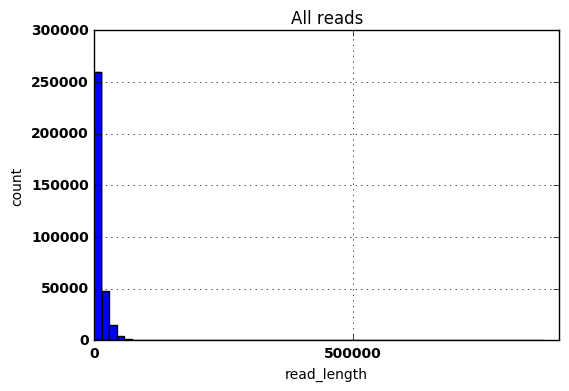

In [22]:
poretools_df['Length'].hist(bins=60)
plt.xlabel('read_length')
plt.xticks(np.arange(0,poretools_df['Length'].max()+1,500000))
plt.ylabel('count')
plt.title('All reads')

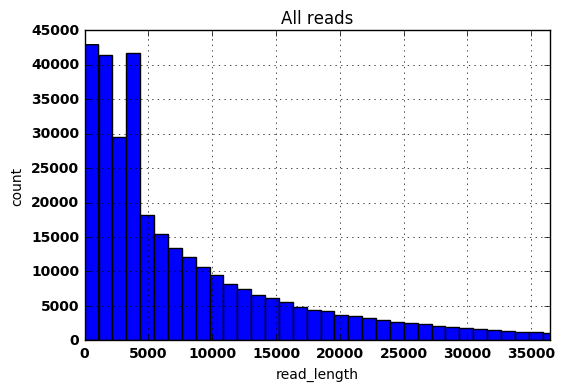

In [37]:
poretools_df['Length'].hist(bins=800)
plt.xlabel('read_length')
plt.xticks(np.arange(0,poretools_df['Length'].mean()*4, 5000))
plt.xlim(0,poretools_df['Length'].mean()*4 )
plt.ylabel('count')
plt.title('All reads')

In [42]:
poretools_df.pivot_table(values=['Length','Q-score'],columns=['folder', 'basecaller'],\
                         aggfunc=[np.max, np.mean, np.median, np.sum])

amax          mean       median  \
        folder basecaller                                              
Length  fail   albacore110  869796.000000   7008.015153  3566.000000   
               metrichor    393492.000000   7034.297736  3458.000000   
        pass   albacore110  141093.000000  10697.849263  6459.000000   
               metrichor    130492.000000  10268.578077  6216.000000   
Q-score fail   albacore110      22.741808     13.342673    13.548764   
               metrichor        10.173099      5.670286     5.752785   
        pass   albacore110      23.607419     18.383803    18.460777   
               metrichor        11.608863      8.475983     8.537544   

                                     sum  
        folder basecaller                 
Length  fail   albacore110  4.541684e+08  
               metrichor    4.570676e+08  
        pass   albacore110  1.055118e+09  
               metrichor    1.012954e+09  
Q-score fail   albacore110  8.646986e+05  
               metrichor    3.684382e+05  
        pass   albacore110  1.813176e+06  
               metrichor    8.361218e+05

In [29]:
poretools_df[poretools_df['Length'] == poretools_df.Length.max()]

,Read_id,Length,Q-score,folder,basecaller
50845,796c8bc7-5189-4a8e-8a2f-fe33a52921a1,869796,8.899461,fail,albacore110


folder  basecaller 
fail    albacore110    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
        metrichor      [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
pass    albacore110    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
        metrichor      [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

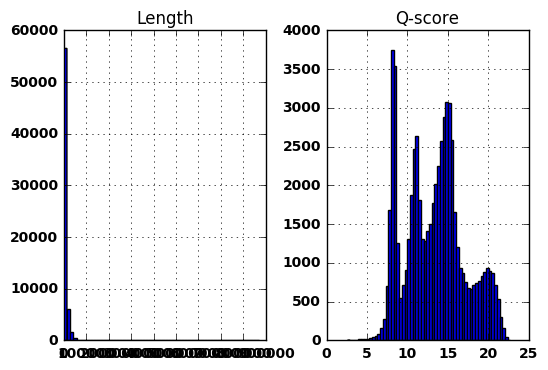

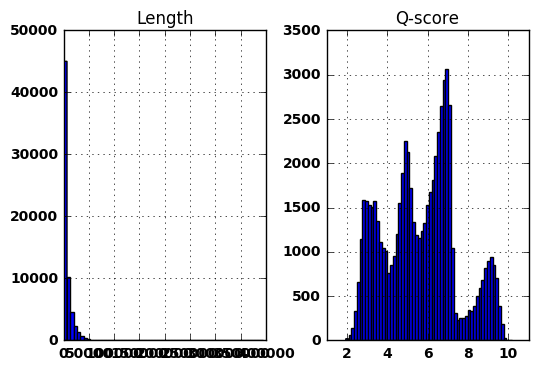

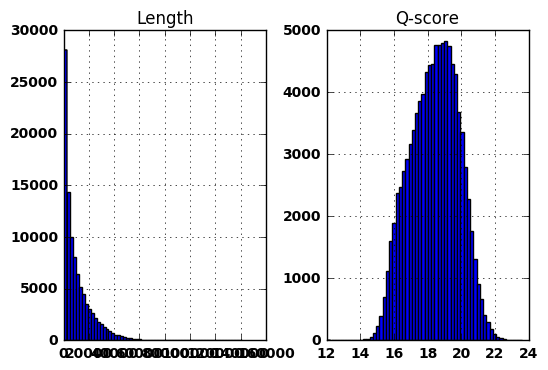

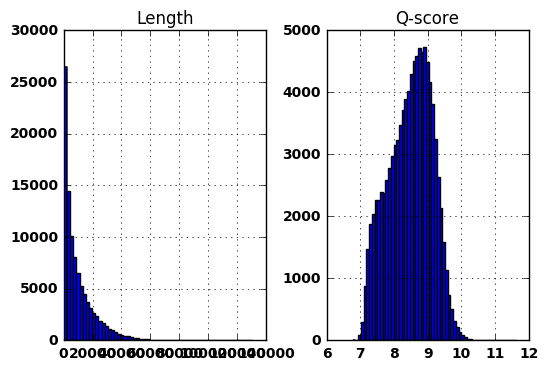

In [44]:
poretools_df.groupby(by=['folder','basecaller']).hist(bins=60)

In [72]:
bams = [os.path.join(ANALYSIS_FOLDER, x) for x in os.listdir(ANALYSIS_FOLDER) if x.endswith('.bam')]

In [73]:
bams

['/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.bwa.sorted.bam',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.ngmlr.sorted.bam',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.pass.fastq.bwa.sorted.bam',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.pass.fastq.ngmlr.sorted.bam',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.metrichor.fail.fastq.bwa.sorted.bam',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.metrichor.fail.fastq.ngmlr.sorted.bam',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.10

In [74]:
genome_fasta = os.path.join(GENOME_FOLDER, genome)
for bam in bams:
    out_name = bam.replace('sorted','sorted.expanded')
    print('convert %s to %s' % (bam, out_name))
    !/Users/ben/anaconda3/envs/py27/bin/python /Users/ben/Documents/work_related/Canberra/Nanopore/nanopore-scripts/expand-cigar.py --bam {bam} --fasta {genome_fasta} > {out_name}

convert /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.bwa.sorted.bam to /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.bwa.sorted.expanded.bam
convert /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.ngmlr.sorted.bam to /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.ngmlr.sorted.expanded.bam
convert /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.pass.fastq.bwa.sorted.bam to /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.pass.fastq.bwa.sorted.expanded.bam
convert /Users/ben/Documents/work_related/Canber

In [76]:
expanded_bams = [os.path.join(ANALYSIS_FOLDER, x) for x in os.listdir(ANALYSIS_FOLDER) if x.endswith('expanded.bam')]

In [79]:
for bam in expanded_bams:
    out_name = bam.replace('sorted.expanded.bam','error_profile.txt')
    
    print('convert %s to %s' % (bam, out_name))
    !/Users/ben/anaconda3/envs/py27/bin/python /Users/ben/Documents/work_related/Canberra/Nanopore/nanopore-scripts_BS/count_errors_BS.py {bam} > {out_name}    

convert /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.bwa.sorted.expanded.bam to /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.bwa.error_profile.txt
convert /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.ngmlr.sorted.expanded.bam to /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.ngmlr.error_profile.txt
convert /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.pass.fastq.bwa.sorted.expanded.bam to /Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.pass.fastq.bwa.error_profile.txt
convert /Users/ben/Document

In [91]:
error_profile_list = [os.path.join(ANALYSIS_FOLDER, x) for x in os.listdir(ANALYSIS_FOLDER) if x.endswith('error_profile.txt')]

In [92]:
error_profile_list

['/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.bwa.error_profile.txt',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.fail.fastq.ngmlr.error_profile.txt',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.pass.fastq.bwa.error_profile.txt',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.albacore110.pass.fastq.ngmlr.error_profile.txt',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.metrichor.fail.fastq.bwa.error_profile.txt',
 '/Users/ben/Documents/work_related/Canberra/Nanopore/analysis/eucalpyt/CP/AY780259.1003_Miriam_data_downloaded.metrichor.fail.fastq.ngmlr.error_profile.txt',
 '/Users/ben/Documents/work_related/Canberra

In [106]:
error_series = []
for file in error_profile_list:
    folder_name = file.split('/')[-1].split('.')[-5]
    basecaller = file.split('/')[-1].split('.')[-6]
    mapper = file.split('/')[-1].split('.')[-3]
    tmp_df = pd.DataFrame.from_csv(file, sep='\t')
    tmp_df['folder'] = folder_name
    tmp_df['basecaller'] = basecaller
    tmp_df['mapper'] = mapper
    
    error_series.append(tmp_df)
error_df = pd.concat(error_series)

In [107]:
error_df["%Identity"] = (error_df['matches']/(error_df['matches']+error_df['deletions']+error_df['insertions']+error_df['mismatches'])*100)

In [108]:
error_df[error_df.read_type == 'f867b962-58f5-4886-9d4e-6d7020be3f8c']

,read_type,read_len,align_len,unalign_len,matches,mismatches,insertions,deletions,tot_errors,folder,basecaller,mapper,%Identity
query,,,,,,,,,,,,,
f867b962-58f5-4886-9d4e-6d7020be3f8c,f867b962-58f5-4886-9d4e-6d7020be3f8c,32560,33439,47,28359,2801,1353,2279,6433,fail,albacore110,bwa,81.510117
f867b962-58f5-4886-9d4e-6d7020be3f8c,f867b962-58f5-4886-9d4e-6d7020be3f8c,32560,33439,47,28742,2008,1763,2689,6460,fail,albacore110,ngmlr,81.648770
f867b962-58f5-4886-9d4e-6d7020be3f8c_Basecall_Alignment_template,f867b962-58f5-4886-9d4e-6d7020be3f8c,30699,33464,21,27459,2568,651,3437,6656,fail,metrichor,bwa,80.489521
f867b962-58f5-4886-9d4e-6d7020be3f8c_Basecall_Alignment_template,f867b962-58f5-4886-9d4e-6d7020be3f8c,30699,33433,48,27785,1883,983,3765,6631,fail,metrichor,ngmlr,80.732799


In [114]:
error_df.pivot_table(values='%Identity',columns=['folder', 'mapper','basecaller'],\
                         aggfunc=[np.max, np.mean, np.median, np.count_nonzero]).round(2)

amax   mean  median  count_nonzero
folder mapper basecaller                                       
fail   bwa    albacore110   95.56  71.53   70.98         3148.0
              metrichor    100.00  72.56   73.31         1869.0
       ngmlr  albacore110  100.00  82.52   81.72          883.0
              metrichor    100.00  79.61   79.65          724.0
pass   bwa    albacore110  100.00  73.38   72.03        15884.0
              metrichor    100.00  77.20   79.31        11351.0
       ngmlr  albacore110   94.56  88.09   88.69         3496.0
              metrichor     94.69  87.18   87.77         3529.0

In [ ]:
error_df["%Identity"] = (error_df['matches']/(error_df['matches']+error_df['deletions']+error_df['insertions']+error_df['mismatches'])*100)

In [ ]:
error_df['%Identity'].hist(bins=30)
plt.xlim(20,100)

In [ ]:
error_df['%Identity'].median()

In [ ]:
error_df['%Identity'].mean()

In [ ]:
error_g20_df = error_df[error_df['%Identity'] > 20]

In [ ]:
error_g20_df['%Identity'].median()

In [ ]:
error_g20_df['%Identity'].mean()

In [ ]:
error_g20_df['%Identity'].hist(bins=30)
plt.xlabel('%Identity')
plt.ylabel('Count')
plt.title('1D error rate Metichor calling')
plt.savefig(outdir+_id+'1D_error_rate.tiff')

In [ ]:
error_g20_df['%Identity'].count()

In [ ]:
poretools_df[1].count()

In [ ]:
pc_mapping = error_g20_df['%Identity'].count()/poretools_df[1].count()*100

In [ ]:
pc_mapping

In [ ]:
error_g20_df['read_len'].max()

In [ ]:
plt.scatter(error_g20_df['read_len'], error_g20_df['%Identity'])
plt.xlim(0,80000)
plt.xlabel('read_length')
plt.ylabel('%Identity')
plt.title('1D error rate Metichor calling')
plt.xticks(np.arange(0,80001,20000))
plt.savefig(outdir+_id+'1D_error_rate_v2.tiff')

In [ ]:
error_g20_df['read_len'].hist(bins=20)
plt.xlabel('read_length')
plt.ylabel('count')

In [ ]:
error_g20_df['read_len'].mean()

In [ ]:
error_g20_df['read_len'].median()